In [1]:
import pandas as pd

c:\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
c:\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data=pd.read_excel('data.xlsx')

In [3]:
print (data)

       X     Y
0    2.0   3.0
1    5.0   1.0
2    4.0   NaN
3    4.0   7.0
4    3.0   NaN
5    2.0   8.0
6    1.0  17.0
7    NaN  21.0
8   12.0   NaN
9    1.0  13.0
10  13.0  12.0
11  15.0  32.0
12   NaN  24.0
13  18.0   NaN
14   5.0  25.0
15  21.0   2.0
16   NaN  13.0
17   2.0  34.0
18   7.0   NaN
19  14.0  38.0
20  18.0  21.0
21  32.0   NaN
22  15.0  33.0
23   4.0  21.0
24   NaN  32.0
25   2.0   NaN
26  19.0   7.0
27  22.0  11.0
28   3.0   NaN
29   8.0  23.0
30  12.0  17.0
31   3.0   NaN
32   NaN  41.0
33   4.0  18.0
34  35.0  21.0
35  17.0   3.0
36  33.0   7.0
37  12.0   NaN
38   NaN  23.0


In [4]:
data=data.replace(' ', data.median())
data=data.fillna(data.mean())
print (data)

            X          Y
0    2.000000   3.000000
1    5.000000   1.000000
2    4.000000  18.206897
3    4.000000   7.000000
4    3.000000  18.206897
5    2.000000   8.000000
6    1.000000  17.000000
7   11.151515  21.000000
8   12.000000  18.206897
9    1.000000  13.000000
10  13.000000  12.000000
11  15.000000  32.000000
12  11.151515  24.000000
13  18.000000  18.206897
14   5.000000  25.000000
15  21.000000   2.000000
16  11.151515  13.000000
17   2.000000  34.000000
18   7.000000  18.206897
19  14.000000  38.000000
20  18.000000  21.000000
21  32.000000  18.206897
22  15.000000  33.000000
23   4.000000  21.000000
24  11.151515  32.000000
25   2.000000  18.206897
26  19.000000   7.000000
27  22.000000  11.000000
28   3.000000  18.206897
29   8.000000  23.000000
30  12.000000  17.000000
31   3.000000  18.206897
32  11.151515  41.000000
33   4.000000  18.000000
34  35.000000  21.000000
35  17.000000   3.000000
36  33.000000   7.000000
37  12.000000  18.206897
38  11.151515  23.000000


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit_predict(data)

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data.values[:,0],data.values[:,1], c=kmeans.labels_, cmap='rainbow')

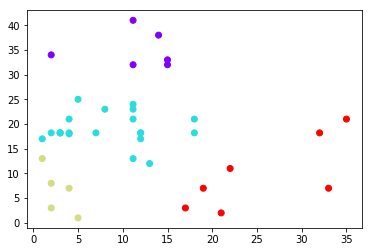

In [7]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit_predict(data)
plt.scatter(data.values[:,0],data.values[:,1], c=kmeans.labels_, cmap='rainbow')

In [8]:
from sklearn.cluster import AgglomerativeClustering

AggClust = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
AggClust.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

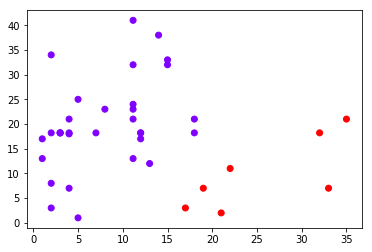

In [9]:
plt.scatter(data.values[:,0],data.values[:,1], c=AggClust.labels_, cmap='rainbow')

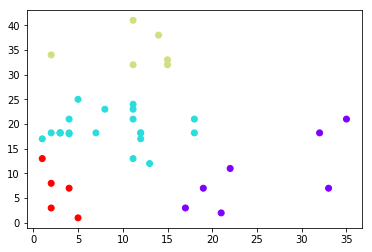

In [10]:
AggClust = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
AggClust.fit_predict(data)
plt.scatter(data.values[:,0],data.values[:,1], c=AggClust.labels_, cmap='rainbow')

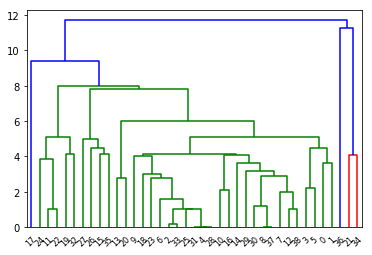

In [11]:
import scipy.cluster.hierarchy as shc
dend = shc.dendrogram(shc.linkage(data, method='single'))

[2 2 1 2 1 2 0 0 0 0 2 0 0 2 0 2 0 0 0 0 2 2 0 0 0 1 2 2 1 0 0 1 0 1 2 2 2
 0 0]


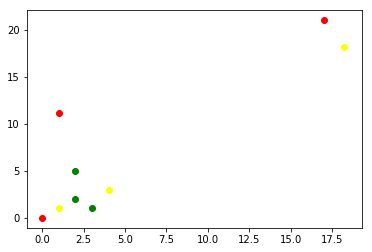

In [42]:

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3) 

gmm.fit(data) 
  
labels = gmm.predict(data) 
print (labels)
data['labels']= labels 
d0=data.values[data['labels']==0]
d1=data.values[data['labels']==1]
d2=data.values[data['labels']==2]

plt.scatter(d0[0], d0[1], c ='r') 
plt.scatter(d1[0], d1[1], c ='yellow') 
plt.scatter(d2[0], d2[1], c='g')
